In [1]:
import json
words_list_file_path = r"C:\Users\ACER\Desktop\wlasl\hospital.json"
with open(words_list_file_path) as f:
    words_list = json.load(f)
print(len(words_list))

62


In [1]:
import os
import shutil

source_dir = r"C:\Users\User\Desktop\project\doctor (1)\doctor\test"
target_dir = r"C:\Users\User\Desktop\project\doctor (1)\doctor"

# Walk through all directories and subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".mp4"):
            # Construct the source file path
            source_file_path = os.path.join(root, file)
            
            # Construct the target file path
            target_file_path = os.path.join(target_dir, file)
            
            # Move the file to the target directory
            shutil.move(source_file_path, target_file_path)
source_dir = r"C:\Users\User\Desktop\project\doctor (1)\doctor\val"
target_dir = r"C:\Users\User\Desktop\project\doctor (1)\doctor"

# Walk through all directories and subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".mp4"):
            # Construct the source file path
            source_file_path = os.path.join(root, file)
            
            # Construct the target file path
            target_file_path = os.path.join(target_dir, file)
            
            # Move the file to the target directory
            shutil.move(source_file_path, target_file_path)
source_dir = r"C:\Users\User\Desktop\project\doctor (1)\doctor\train"
target_dir = r"C:\Users\User\Desktop\project\doctor (1)\doctor"

# Walk through all directories and subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".mp4"):
            # Construct the source file path
            source_file_path = os.path.join(root, file)
            
            # Construct the target file path
            target_file_path = os.path.join(target_dir, file)
            
            # Move the file to the target directory
            shutil.move(source_file_path, target_file_path)

In [2]:
import tqdm
import random
import pathlib
import itertools
import collections

import os
import cv2
import einops
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import time
import imageio
from IPython import display
from urllib import request

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [3]:
def get_class(fname):
  """ Retrieve the name of the class given a filename.

    Args:
      fname: Name of the file in the UCF101 dataset.

    Returns:
      Class that the file belongs to.
  """
  return fname.split('_')[0]
def get_position(fname):
  """ Retrieve the name of the class given a filename.

    Args:
      fname: Name of the file in the UCF101 dataset.

    Returns:
      Class that the file belongs to.
  """
  try:
      return fname.split('_')[1]
  except:
      return "nope"
def get_files_per_class(files):
    """ Retrieve the files that belong to each class.

    Args:
      files: List of files in the dataset.

    Returns:
      Dictionary of class names (key) and files (values). 
    """
    files_for_class = collections.defaultdict(list)
    for fname in files:
        class_name = get_class(fname)
        files_for_class[class_name].append(fname)
    return files_for_class
def select_subset_of_classes(files_for_class, classes, files_per_class):
  """ Create a dictionary with the class name and a subset of the files in that class.

    Args:
      files_for_class: Dictionary of class names (key) and files (values).
      classes: List of classes.
      files_per_class: Number of files per class of interest.

    Returns:
      Dictionary with class as key and list of specified number of video files in that class.
  """
  files_subset = dict()

  for class_name in classes:
    class_files = files_for_class[class_name]
    files_subset[class_name] = class_files[:files_per_class]

  return files_subset
def download_from_zip(source_dir, to_dir, file_names):
    """ Download the contents of the zip file from the zip URL.

    Args:
      zip_url: A URL with a zip file containing data.
      to_dir: A directory to download data to.
      file_names: Names of files to download.
    """
    for fn in tqdm.tqdm(file_names):
        class_name = get_class(fn)
        source_file = source_dir / fn
        output_dir = to_dir / class_name
        output_file = to_dir / class_name / fn
        os.makedirs(output_dir, exist_ok=True)
        source_file.rename(output_file)
def split_class_lists(files_for_class, count):
  """ Returns the list of files belonging to a subset of data as well as the remainder of
    files that need to be downloaded.
    
    Args:
      files_for_class: Files belonging to a particular class of data.
      count: Number of files to download.

    Returns:
      Files belonging to the subset of data and dictionary of the remainder of files that need to be downloaded.
  """
  split_files = []
  remainder = {}
  for cls in files_for_class:
    split_files.extend(files_for_class[cls][:count])
    remainder[cls] = files_for_class[cls][count:]
  return split_files, remainder
def download_ucf_100_subset(num_classes, splits, download_dir):
  """ Download a subset of the UCF101 dataset and split them into various parts, such as
    training, validation, and test.

    Args:
      zip_url: A URL with a ZIP file with the data.
      num_classes: Number of labels.
      splits: Dictionary specifying the training, validation, test, etc. (key) division of data 
              (value is number of files per split).
      download_dir: Directory to download data to.

    Return:
      Mapping of the directories containing the subsections of data.
  """
  files = os.listdir(r"C:\Users\User\Desktop\project\doctor (1)\doctor")
  
  files_for_class = get_files_per_class(files)

  classes = list(files_for_class.keys())[:num_classes]

  for cls in classes:
    random.shuffle(files_for_class[cls])
    
  # Only use the number of classes you want in the dictionary
  files_for_class = {x: files_for_class[x] for x in classes}

  dirs = {}
  for split_name, split_count in splits.items():
    print(split_name, ":")
    split_dir = download_dir / split_name
    split_files, files_for_class = split_class_lists(files_for_class, split_count)
    download_from_zip(download_dir, split_dir, split_files)
    dirs[split_name] = split_dir

  return dirs

In [4]:
NUM_CLASSES = 62
FILES_PER_CLASS = 20
download_dir = pathlib.Path(r'C:\Users\User\Desktop\project\doctor (1)\doctor')
subset_paths = download_ucf_100_subset(num_classes = NUM_CLASSES,
                                       splits = {"train": 14, "val": 3, "test": 3},
                                       download_dir = download_dir)

train :


100%|██████████| 868/868 [00:00<00:00, 3115.75it/s]


val :


100%|██████████| 186/186 [00:00<00:00, 2848.30it/s]


test :


100%|██████████| 186/186 [00:00<00:00, 2827.63it/s]


In [5]:
video_count_train = len(list(download_dir.glob('train/*/*.mp4')))
video_count_val = len(list(download_dir.glob('val/*/*.mp4')))
video_count_test = len(list(download_dir.glob('test/*/*.mp4')))
video_total = video_count_train + video_count_val + video_count_test
print(f"Total videos: {video_total}")

Total videos: 1240


In [6]:
import os
import math
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_video
from torchvision.transforms import Compose, Lambda, Resize
from torchvision.transforms._transforms_video import CenterCropVideo
from torchvision.transforms.functional import pad
import threading
from queue import Queue

C:\Users\User\anaconda3\envs\pytorchgpu\lib\site-packages\torchvision\transforms\_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
C:\Users\User\anaconda3\envs\pytorchgpu\lib\site-packages\torchvision\transforms\_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


In [7]:
# Define the normalize function at the top level
def normalize(x):
    return x / 255.0

class VideoDataset(Dataset):
    def __init__(self, directory, transform=None, frames_per_clip=25, resize_dims=(224, 224)):
        self.directory = directory
        self.transform = transform
        self.frames_per_clip = frames_per_clip
        self.resize_dims = resize_dims
        self.classes = sorted(os.listdir(directory))  # Assuming each class has its own directory
        self.files = []
        for class_index, _class in enumerate(self.classes):
            class_dir = os.path.join(directory, _class)
            self.files += [(os.path.join(class_dir, f), class_index) for f in os.listdir(class_dir)]

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        try:
            file_path, class_index = self.files[idx]
            video, _, info = read_video(file_path, pts_unit='sec')
            total_frames = video.shape[0]

            # Adjust the frame dimension for interpolation
            video = video.permute(0, 3, 1, 2)  # Change to [frames, channels, height, width]

            # Resize frames to a uniform size
            resized_video = torch.nn.functional.interpolate(video, size=self.resize_dims, mode='bilinear', align_corners=False)

            frame_indices = torch.arange(0, total_frames, 5)

            video = resized_video[frame_indices]

            if video.size(0) > self.frames_per_clip:
                # If more frames than needed, trim the video to keep only the required frames
                video = video[:self.frames_per_clip]

            elif video.size(0) < self.frames_per_clip:
                # If fewer frames than needed, fill the end with black frames
                num_missing_frames = self.frames_per_clip - video.size(0)
                black_frames = torch.zeros(num_missing_frames, *video.shape[1:], dtype=video.dtype, device=video.device)
                video = torch.cat((video, black_frames), dim=0)

            video = video.permute(1, 0, 2, 3)  # Change back to [frames, height, width, channels]

            if self.transform:
                # Ensure your transform can handle batched frames correctly
                video = self.transform(video)

            return video, class_index
        except Exception as e:
            print(f"Error loading data at index {idx}: {e}")
            return None

In [8]:
transform = Compose([
    Lambda(normalize),  # Normalize to [0,1]
])

# Initialize datasets
train_dataset = VideoDataset(subset_paths['train'], transform=transform)
val_dataset = VideoDataset(subset_paths['val'], transform=transform)
test_dataset = VideoDataset(subset_paths['test'], transform=transform)

# DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False, num_workers=0)

# batch_size = 4  # Adjust batch size as needed
# num_threads = 2  # Adjust number of threads as needed
# train_loader = CustomDataLoader(train_dataset, batch_size=batch_size, num_threads=num_threads)
# val_loader = CustomDataLoader(val_dataset, batch_size=batch_size, num_threads=num_threads)
# test_loader = CustomDataLoader(test_dataset, batch_size=batch_size, num_threads=num_threads)

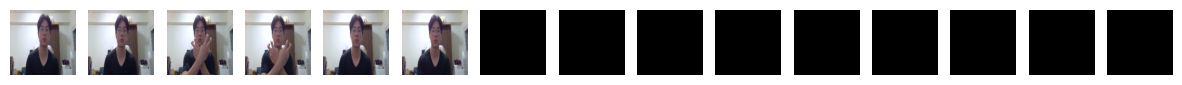

In [9]:
import torch
import matplotlib.pyplot as plt
from torchvision.io import read_video
from torch.utils.data import Dataset
import os

# Your existing dataset class and normalize function seems fine for this purpose

# Function to plot a single video
def plot_video(video_tensor):
    """
    Plots frames from a video tensor.
    Assumes video_tensor is in shape [channels, frames, height, width]
    and the pixel values are normalized between 0 and 1.
    """
    fig, axs = plt.subplots(nrows=1, ncols=video_tensor.shape[1], figsize=(15, 5))
    for i, frame in enumerate(video_tensor.permute(1, 0, 2, 3)):  # permute frames to the front
        axs[i].imshow(frame.permute(1, 2, 0))  # permute to [height, width, channels]
        axs[i].axis('off')
    plt.show()

# Example of how to visualize a video from the train dataset
def show_sample(dataset):
    # Fetch a sample from the dataset
    video, _ = dataset[77]  # Change 0 to another index to see different samples
    # Assuming the video is already in the right shape and normalized
    plot_video(video)

# Assuming you have initialized train_dataset somewhere as shown previously
show_sample(train_dataset)


In [9]:
import torch
import torch.nn as nn
from torchvision import models
from resnext import ResNeXt
from resnext import ResNeXtBottleneck

# Define the parameters for the ResNeXt model
block_type = ResNeXtBottleneck  # You can use a specific type of block, such as ResNeXtBottleneck
layers = [3, 4, 23, 3]  # Specify the number of layers in each block
sample_size = 224  # Specify the input size of each frame/image
sample_duration = 16  # Specify the number of frames in the input sequence

# Initialize the MobileNetV2 model
# Make sure the model architecture parameters match those of the pretrained model
model = ResNeXt(
    block=block_type,
    layers=layers,
    sample_size=sample_size,
    sample_duration=sample_duration,
    num_classes=27
)

state_dict = torch.load('jester_resnext_101_RGB_16_best.pth')

new_state_dict = {}
for key, value in state_dict['state_dict'].items():
    if key.startswith('module.'):
        new_key = key[7:]  # Remove 'module.' prefix
        new_state_dict[new_key] = value
    else:
        new_state_dict[key] = value

# Load the state dictionary into the model
model.load_state_dict(new_state_dict)

for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Sequential(
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.BatchNorm1d(4096),
    nn.Dropout(0.2),
    nn.Linear(4096, 8192),
    nn.ReLU(),
    nn.BatchNorm1d(8192),
    nn.Dropout(0.2),
    nn.Linear(8192, 62),
)

C:\Users\User\anaconda3\envs\pytorchgpu\lib\site-packages\resnext.py:129: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  m.weight = nn.init.kaiming_normal(m.weight, mode='fan_out')
C:\Users\User\anaconda3\envs\pytorchgpu\lib\site-packages\torch\serialization.py:268: UserWarning: expandable_segments not supported on this platform (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10/cuda/CUDAAllocatorConfig.h:28.)
  return torch.UntypedStorage(obj.nbytes(), device=torch.device(location))


In [2]:
from torchsummary import summary
input_size = (3, 25, 224, 224)

summary(model.cuda(), input_size)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x9216 and 18432x2048)

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
model.to(device)


ResNeXt(
  (conv1): Conv3d(3, 64, kernel_size=(7, 7, 7), stride=(1, 2, 2), padding=(3, 3, 3), bias=False)
  (bn1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool3d(kernel_size=(3, 3, 3), stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): ResNeXtBottleneck(
      (conv1): Conv3d(64, 128, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
      (bn1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv3d(128, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), groups=32, bias=False)
      (bn2): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv3d(128, 256, kernel_size=(1, 1, 1), stride=(1, 1, 1), bias=False)
      (bn3): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequentia

In [11]:
from tqdm import tqdm
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

num_epochs = 100
optimizer = optim.Adam(model.parameters(), lr=0.00001, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()

def accuracy(model, dataloader):
      model.eval()
      total_correct = 0
      total_instances = 0
      for frames, labels in tqdm(dataloader):
        frames, labels = frames.to(device), labels.to(device)
        predictions = torch.argmax(model(frames), dim=1)
        correct_predictions = sum(predictions==labels).item()
        total_correct+=correct_predictions
        total_instances+=len(frames)
      return round(total_correct/total_instances, 3)

log_dict = {
        'training_loss_per_batch': [],
        'validation_loss_per_batch': [],
        'training_accuracy_per_epoch': [],
        'validation_accuracy_per_epoch': []
    }

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    train_losses = []
    
    # Training phase
    model.train()
    print('training...')
    for frames, labels in tqdm(train_loader):
        # Move your batches to the appropriate device
        frames, labels = frames.to(device), labels.to(device)
        # Forward pass, backward pass, and optimize
        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        log_dict['training_loss_per_batch'].append(loss.item())
        train_losses.append(loss.item())
        loss.backward()
        optimizer.step()
    # Validation phase
    with torch.no_grad():
        print('deriving training accuracy...')
        #  computing training accuracy
        train_accuracy = accuracy(model, train_loader)
        log_dict['training_accuracy_per_epoch'].append(train_accuracy)

    print("validating...")
    val_losses = []
    model.eval()
    with torch.no_grad():
        for frames, labels in tqdm(val_loader):
            frames, labels = frames.to(device), labels.to(device)
            outputs = model(frames)
            val_loss = criterion(outputs, labels)
            log_dict['validation_loss_per_batch'].append(val_loss.item())
            val_losses.append(val_loss.item())
            # Compute validation loss, accuracy, etc.
        print('deriving validation accuracy...')
        val_accuracy = accuracy(model, val_loader)
        log_dict['validation_accuracy_per_epoch'].append(val_accuracy)

    train_losses = np.array(train_losses).mean()
    val_losses = np.array(val_losses).mean()
    print("epoch",epoch+1)

    print(f'training_loss: {round(train_losses, 4)}  training_accuracy: '+
          f'{train_accuracy}  validation_loss: {round(val_losses, 4)} '+  \
          f'validation_accuracy: {val_accuracy}\n')

Epoch 1/100
training...


  0%|          | 0/434 [00:00<?, ?it/s]C:\Users\User\anaconda3\envs\pytorchgpu\lib\site-packages\torch\nn\modules\conv.py:605: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv3d(
100%|██████████| 434/434 [07:51<00:00,  1.09s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:31<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


epoch 1
training_loss: 4.2781  training_accuracy: 0.04  validation_loss: 4.1803 validation_accuracy: 0.027

Epoch 2/100
training...


100%|██████████| 434/434 [07:29<00:00,  1.04s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:31<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:49<00:00,  1.17s/it]


epoch 2
training_loss: 4.0937  training_accuracy: 0.073  validation_loss: 4.0844 validation_accuracy: 0.022

Epoch 3/100
training...


100%|██████████| 434/434 [07:30<00:00,  1.04s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:32<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:50<00:00,  1.19s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


epoch 3
training_loss: 4.0335  training_accuracy: 0.105  validation_loss: 3.9538 validation_accuracy: 0.048

Epoch 4/100
training...


100%|██████████| 434/434 [07:33<00:00,  1.04s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:33<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


epoch 4
training_loss: 3.9268  training_accuracy: 0.138  validation_loss: 3.9084 validation_accuracy: 0.054

Epoch 5/100
training...


100%|██████████| 434/434 [07:31<00:00,  1.04s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:33<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


epoch 5
training_loss: 3.8469  training_accuracy: 0.167  validation_loss: 3.8375 validation_accuracy: 0.081

Epoch 6/100
training...


100%|██████████| 434/434 [07:32<00:00,  1.04s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:32<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


epoch 6
training_loss: 3.7973  training_accuracy: 0.196  validation_loss: 3.8178 validation_accuracy: 0.091

Epoch 7/100
training...


100%|██████████| 434/434 [07:31<00:00,  1.04s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:33<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


epoch 7
training_loss: 3.7745  training_accuracy: 0.181  validation_loss: 3.9141 validation_accuracy: 0.07

Epoch 8/100
training...


100%|██████████| 434/434 [07:32<00:00,  1.04s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:32<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


epoch 8
training_loss: 3.7332  training_accuracy: 0.195  validation_loss: 3.8067 validation_accuracy: 0.102

Epoch 9/100
training...


100%|██████████| 434/434 [07:33<00:00,  1.05s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:45<00:00,  1.07s/it]


validating...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


epoch 9
training_loss: 3.7117  training_accuracy: 0.206  validation_loss: 3.8339 validation_accuracy: 0.134

Epoch 10/100
training...


100%|██████████| 434/434 [07:43<00:00,  1.07s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:46<00:00,  1.07s/it]


validating...


100%|██████████| 93/93 [01:53<00:00,  1.22s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


epoch 10
training_loss: 3.6742  training_accuracy: 0.206  validation_loss: 3.7111 validation_accuracy: 0.108

Epoch 11/100
training...


100%|██████████| 434/434 [07:42<00:00,  1.07s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:45<00:00,  1.07s/it]


validating...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


epoch 11
training_loss: 3.671  training_accuracy: 0.214  validation_loss: 3.6868 validation_accuracy: 0.097

Epoch 12/100
training...


100%|██████████| 434/434 [07:42<00:00,  1.07s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:45<00:00,  1.07s/it]


validating...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


epoch 12
training_loss: 3.6767  training_accuracy: 0.236  validation_loss: 3.6706 validation_accuracy: 0.113

Epoch 13/100
training...


100%|██████████| 434/434 [07:42<00:00,  1.07s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:45<00:00,  1.07s/it]


validating...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


epoch 13
training_loss: 3.6862  training_accuracy: 0.237  validation_loss: 3.723 validation_accuracy: 0.129

Epoch 14/100
training...


100%|██████████| 434/434 [07:42<00:00,  1.07s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:45<00:00,  1.07s/it]


validating...


100%|██████████| 93/93 [01:53<00:00,  1.22s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:53<00:00,  1.22s/it]


epoch 14
training_loss: 3.6904  training_accuracy: 0.203  validation_loss: 3.7705 validation_accuracy: 0.097

Epoch 15/100
training...


100%|██████████| 434/434 [07:43<00:00,  1.07s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:46<00:00,  1.07s/it]


validating...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


epoch 15
training_loss: 3.6527  training_accuracy: 0.25  validation_loss: 3.7233 validation_accuracy: 0.118

Epoch 16/100
training...


100%|██████████| 434/434 [07:48<00:00,  1.08s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:24<00:00,  1.16s/it]


validating...


100%|██████████| 93/93 [02:02<00:00,  1.31s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:02<00:00,  1.32s/it]


epoch 16
training_loss: 3.6572  training_accuracy: 0.242  validation_loss: 3.7395 validation_accuracy: 0.113

Epoch 17/100
training...


100%|██████████| 434/434 [08:36<00:00,  1.19s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:15<00:00,  1.14s/it]


validating...


100%|██████████| 93/93 [02:01<00:00,  1.30s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:07<00:00,  1.37s/it]


epoch 17
training_loss: 3.6318  training_accuracy: 0.252  validation_loss: 3.7185 validation_accuracy: 0.108

Epoch 18/100
training...


100%|██████████| 434/434 [08:23<00:00,  1.16s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:37<00:00,  1.19s/it]


validating...


100%|██████████| 93/93 [02:06<00:00,  1.36s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:04<00:00,  1.34s/it]


epoch 18
training_loss: 3.5948  training_accuracy: 0.259  validation_loss: 3.6893 validation_accuracy: 0.129

Epoch 19/100
training...


100%|██████████| 434/434 [08:28<00:00,  1.17s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:16<00:00,  1.14s/it]


validating...


100%|██████████| 93/93 [01:55<00:00,  1.24s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:56<00:00,  1.26s/it]


epoch 19
training_loss: 3.6022  training_accuracy: 0.25  validation_loss: 3.7265 validation_accuracy: 0.113

Epoch 20/100
training...


100%|██████████| 434/434 [08:05<00:00,  1.12s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:07<00:00,  1.12s/it]


validating...


100%|██████████| 93/93 [01:57<00:00,  1.26s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:57<00:00,  1.26s/it]


epoch 20
training_loss: 3.5948  training_accuracy: 0.257  validation_loss: 3.6685 validation_accuracy: 0.102

Epoch 21/100
training...


100%|██████████| 434/434 [08:08<00:00,  1.13s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:07<00:00,  1.12s/it]


validating...


100%|██████████| 93/93 [01:57<00:00,  1.26s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:57<00:00,  1.26s/it]


epoch 21
training_loss: 3.5819  training_accuracy: 0.278  validation_loss: 3.6372 validation_accuracy: 0.097

Epoch 22/100
training...


100%|██████████| 434/434 [08:07<00:00,  1.12s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:05<00:00,  1.12s/it]


validating...


100%|██████████| 93/93 [01:57<00:00,  1.26s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:57<00:00,  1.27s/it]


epoch 22
training_loss: 3.5674  training_accuracy: 0.242  validation_loss: 3.7418 validation_accuracy: 0.124

Epoch 23/100
training...


100%|██████████| 434/434 [08:07<00:00,  1.12s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:29<00:00,  1.17s/it]


validating...


100%|██████████| 93/93 [02:03<00:00,  1.32s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:02<00:00,  1.32s/it]


epoch 23
training_loss: 3.5992  training_accuracy: 0.258  validation_loss: 3.7742 validation_accuracy: 0.097

Epoch 24/100
training...


100%|██████████| 434/434 [08:31<00:00,  1.18s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:44<00:00,  1.21s/it]


validating...


100%|██████████| 93/93 [02:28<00:00,  1.60s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:26<00:00,  1.57s/it]


epoch 24
training_loss: 3.6136  training_accuracy: 0.25  validation_loss: 3.7197 validation_accuracy: 0.118

Epoch 25/100
training...


100%|██████████| 434/434 [10:08<00:00,  1.40s/it]


deriving training accuracy...


100%|██████████| 434/434 [10:01<00:00,  1.39s/it]


validating...


100%|██████████| 93/93 [02:22<00:00,  1.53s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:30<00:00,  1.62s/it]


epoch 25
training_loss: 3.4997  training_accuracy: 0.268  validation_loss: 3.7693 validation_accuracy: 0.14

Epoch 26/100
training...


100%|██████████| 434/434 [10:13<00:00,  1.41s/it]


deriving training accuracy...


100%|██████████| 434/434 [10:05<00:00,  1.40s/it]


validating...


100%|██████████| 93/93 [02:29<00:00,  1.61s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:17<00:00,  1.48s/it]


epoch 26
training_loss: 3.5379  training_accuracy: 0.256  validation_loss: 3.8885 validation_accuracy: 0.118

Epoch 27/100
training...


100%|██████████| 434/434 [10:36<00:00,  1.47s/it]


deriving training accuracy...


100%|██████████| 434/434 [10:33<00:00,  1.46s/it]


validating...


100%|██████████| 93/93 [02:28<00:00,  1.59s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:29<00:00,  1.61s/it]


epoch 27
training_loss: 3.5443  training_accuracy: 0.287  validation_loss: 3.6995 validation_accuracy: 0.091

Epoch 28/100
training...


100%|██████████| 434/434 [09:59<00:00,  1.38s/it]


deriving training accuracy...


100%|██████████| 434/434 [09:10<00:00,  1.27s/it]


validating...


100%|██████████| 93/93 [02:12<00:00,  1.43s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:11<00:00,  1.41s/it]


epoch 28
training_loss: 3.5155  training_accuracy: 0.278  validation_loss: 3.7156 validation_accuracy: 0.129

Epoch 29/100
training...


100%|██████████| 434/434 [09:23<00:00,  1.30s/it]


deriving training accuracy...


100%|██████████| 434/434 [09:02<00:00,  1.25s/it]


validating...


100%|██████████| 93/93 [02:11<00:00,  1.42s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:12<00:00,  1.43s/it]


epoch 29
training_loss: 3.4987  training_accuracy: 0.272  validation_loss: 3.7382 validation_accuracy: 0.113

Epoch 30/100
training...


100%|██████████| 434/434 [09:14<00:00,  1.28s/it]


deriving training accuracy...


100%|██████████| 434/434 [09:02<00:00,  1.25s/it]


validating...


100%|██████████| 93/93 [02:05<00:00,  1.35s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:02<00:00,  1.32s/it]


epoch 30
training_loss: 3.5316  training_accuracy: 0.267  validation_loss: 3.6811 validation_accuracy: 0.134

Epoch 31/100
training...


100%|██████████| 434/434 [09:39<00:00,  1.33s/it]


deriving training accuracy...


100%|██████████| 434/434 [09:44<00:00,  1.35s/it]


validating...


100%|██████████| 93/93 [02:17<00:00,  1.48s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:13<00:00,  1.44s/it]


epoch 31
training_loss: 3.5433  training_accuracy: 0.268  validation_loss: 3.7068 validation_accuracy: 0.108

Epoch 32/100
training...


100%|██████████| 434/434 [07:39<00:00,  1.06s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:31<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:50<00:00,  1.19s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:49<00:00,  1.17s/it]


epoch 32
training_loss: 3.4978  training_accuracy: 0.236  validation_loss: 3.8377 validation_accuracy: 0.081

Epoch 33/100
training...


100%|██████████| 434/434 [07:29<00:00,  1.04s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:35<00:00,  1.05s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.16s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


epoch 33
training_loss: 3.5461  training_accuracy: 0.263  validation_loss: 3.7099 validation_accuracy: 0.102

Epoch 34/100
training...


100%|██████████| 434/434 [07:21<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:20<00:00,  1.01s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.15s/it]


epoch 34
training_loss: 3.5026  training_accuracy: 0.257  validation_loss: 3.7985 validation_accuracy: 0.118

Epoch 35/100
training...


100%|██████████| 434/434 [07:27<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:22<00:00,  1.02s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


epoch 35
training_loss: 3.5311  training_accuracy: 0.271  validation_loss: 3.7573 validation_accuracy: 0.113

Epoch 36/100
training...


100%|██████████| 434/434 [07:22<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:22<00:00,  1.02s/it]


validating...


100%|██████████| 93/93 [01:46<00:00,  1.15s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:48<00:00,  1.16s/it]


epoch 36
training_loss: 3.4917  training_accuracy: 0.265  validation_loss: 3.7365 validation_accuracy: 0.113

Epoch 37/100
training...


100%|██████████| 434/434 [07:19<00:00,  1.01s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:27<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.15s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


epoch 37
training_loss: 3.487  training_accuracy: 0.278  validation_loss: 3.7248 validation_accuracy: 0.124

Epoch 38/100
training...


100%|██████████| 434/434 [07:20<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:26<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:46<00:00,  1.15s/it]


epoch 38
training_loss: 3.4829  training_accuracy: 0.293  validation_loss: 3.7098 validation_accuracy: 0.129

Epoch 39/100
training...


100%|██████████| 434/434 [07:20<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:27<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:46<00:00,  1.15s/it]


epoch 39
training_loss: 3.4573  training_accuracy: 0.274  validation_loss: 3.7065 validation_accuracy: 0.118

Epoch 40/100
training...


100%|██████████| 434/434 [07:22<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:21<00:00,  1.02s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.15s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.15s/it]


epoch 40
training_loss: 3.5666  training_accuracy: 0.256  validation_loss: 3.8936 validation_accuracy: 0.075

Epoch 41/100
training...


100%|██████████| 434/434 [07:20<00:00,  1.01s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:22<00:00,  1.02s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.15s/it]


epoch 41
training_loss: 3.4794  training_accuracy: 0.304  validation_loss: 3.6689 validation_accuracy: 0.14

Epoch 42/100
training...


100%|██████████| 434/434 [07:21<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:26<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:46<00:00,  1.15s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:46<00:00,  1.15s/it]


epoch 42
training_loss: 3.4585  training_accuracy: 0.288  validation_loss: 3.7074 validation_accuracy: 0.102

Epoch 43/100
training...


100%|██████████| 434/434 [07:21<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:22<00:00,  1.02s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.15s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.15s/it]


epoch 43
training_loss: 3.4622  training_accuracy: 0.26  validation_loss: 3.8548 validation_accuracy: 0.091

Epoch 44/100
training...


100%|██████████| 434/434 [07:20<00:00,  1.01s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:25<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.15s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.15s/it]


epoch 44
training_loss: 3.5158  training_accuracy: 0.268  validation_loss: 3.7702 validation_accuracy: 0.097

Epoch 45/100
training...


100%|██████████| 434/434 [07:19<00:00,  1.01s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:22<00:00,  1.02s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.15s/it]


epoch 45
training_loss: 3.4187  training_accuracy: 0.293  validation_loss: 3.7337 validation_accuracy: 0.113

Epoch 46/100
training...


100%|██████████| 434/434 [07:20<00:00,  1.01s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:23<00:00,  1.02s/it]


validating...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


epoch 46
training_loss: 3.4475  training_accuracy: 0.251  validation_loss: 3.8087 validation_accuracy: 0.102

Epoch 47/100
training...


100%|██████████| 434/434 [07:23<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:25<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


epoch 47
training_loss: 3.4745  training_accuracy: 0.286  validation_loss: 3.7269 validation_accuracy: 0.129

Epoch 48/100
training...


100%|██████████| 434/434 [07:23<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:24<00:00,  1.02s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.15s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.15s/it]


epoch 48
training_loss: 3.4506  training_accuracy: 0.29  validation_loss: 3.7534 validation_accuracy: 0.113

Epoch 49/100
training...


100%|██████████| 434/434 [07:22<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:23<00:00,  1.02s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


epoch 49
training_loss: 3.4516  training_accuracy: 0.31  validation_loss: 3.6949 validation_accuracy: 0.14

Epoch 50/100
training...


100%|██████████| 434/434 [07:21<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:22<00:00,  1.02s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


epoch 50
training_loss: 3.4621  training_accuracy: 0.296  validation_loss: 3.6352 validation_accuracy: 0.129

Epoch 51/100
training...


100%|██████████| 434/434 [07:22<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:24<00:00,  1.02s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


epoch 51
training_loss: 3.3949  training_accuracy: 0.302  validation_loss: 3.6652 validation_accuracy: 0.124

Epoch 52/100
training...


100%|██████████| 434/434 [07:26<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:25<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


epoch 52
training_loss: 3.4173  training_accuracy: 0.302  validation_loss: 3.6619 validation_accuracy: 0.129

Epoch 53/100
training...


100%|██████████| 434/434 [07:23<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:23<00:00,  1.02s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


epoch 53
training_loss: 3.5041  training_accuracy: 0.305  validation_loss: 3.6712 validation_accuracy: 0.161

Epoch 54/100
training...


100%|██████████| 434/434 [07:23<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:27<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:49<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:50<00:00,  1.19s/it]


epoch 54
training_loss: 3.4334  training_accuracy: 0.272  validation_loss: 3.7136 validation_accuracy: 0.108

Epoch 55/100
training...


100%|██████████| 434/434 [07:48<00:00,  1.08s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:48<00:00,  1.08s/it]


validating...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


epoch 55
training_loss: 3.4431  training_accuracy: 0.294  validation_loss: 3.5681 validation_accuracy: 0.156

Epoch 56/100
training...


100%|██████████| 434/434 [07:40<00:00,  1.06s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:50<00:00,  1.08s/it]


validating...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


epoch 56
training_loss: 3.4523  training_accuracy: 0.316  validation_loss: 3.6518 validation_accuracy: 0.156

Epoch 57/100
training...


100%|██████████| 434/434 [07:53<00:00,  1.09s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:55<00:00,  1.10s/it]


validating...


100%|██████████| 93/93 [01:51<00:00,  1.19s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


epoch 57
training_loss: 3.4528  training_accuracy: 0.297  validation_loss: 3.6736 validation_accuracy: 0.151

Epoch 58/100
training...


100%|██████████| 434/434 [07:28<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:28<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.16s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


epoch 58
training_loss: 3.4675  training_accuracy: 0.282  validation_loss: 3.6324 validation_accuracy: 0.129

Epoch 59/100
training...


100%|██████████| 434/434 [07:28<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:31<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:48<00:00,  1.16s/it]


epoch 59
training_loss: 3.4426  training_accuracy: 0.317  validation_loss: 3.5631 validation_accuracy: 0.156

Epoch 60/100
training...


100%|██████████| 434/434 [07:26<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:29<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


epoch 60
training_loss: 3.4174  training_accuracy: 0.3  validation_loss: 3.6422 validation_accuracy: 0.102

Epoch 61/100
training...


100%|██████████| 434/434 [07:26<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:31<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:49<00:00,  1.18s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


epoch 61
training_loss: 3.3976  training_accuracy: 0.304  validation_loss: 3.6778 validation_accuracy: 0.129

Epoch 62/100
training...


100%|██████████| 434/434 [07:24<00:00,  1.02s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:26<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


epoch 62
training_loss: 3.4  training_accuracy: 0.3  validation_loss: 3.6283 validation_accuracy: 0.108

Epoch 63/100
training...


100%|██████████| 434/434 [07:25<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:27<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


epoch 63
training_loss: 3.365  training_accuracy: 0.304  validation_loss: 3.6305 validation_accuracy: 0.156

Epoch 64/100
training...


100%|██████████| 434/434 [07:26<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:29<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


epoch 64
training_loss: 3.3879  training_accuracy: 0.288  validation_loss: 3.7073 validation_accuracy: 0.091

Epoch 65/100
training...


100%|██████████| 434/434 [07:26<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:28<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:48<00:00,  1.16s/it]


epoch 65
training_loss: 3.3896  training_accuracy: 0.32  validation_loss: 3.6346 validation_accuracy: 0.14

Epoch 66/100
training...


100%|██████████| 434/434 [07:25<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:27<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


epoch 66
training_loss: 3.4056  training_accuracy: 0.303  validation_loss: 3.6072 validation_accuracy: 0.151

Epoch 67/100
training...


100%|██████████| 434/434 [07:27<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:28<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:48<00:00,  1.17s/it]


epoch 67
training_loss: 3.4212  training_accuracy: 0.304  validation_loss: 3.6921 validation_accuracy: 0.113

Epoch 68/100
training...


100%|██████████| 434/434 [07:25<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:28<00:00,  1.03s/it]


validating...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:47<00:00,  1.16s/it]


epoch 68
training_loss: 3.3739  training_accuracy: 0.317  validation_loss: 3.6353 validation_accuracy: 0.145

Epoch 69/100
training...


100%|██████████| 434/434 [07:26<00:00,  1.03s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:45<00:00,  1.07s/it]


validating...


100%|██████████| 93/93 [01:55<00:00,  1.24s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:55<00:00,  1.25s/it]


epoch 69
training_loss: 3.4536  training_accuracy: 0.281  validation_loss: 3.6522 validation_accuracy: 0.129

Epoch 70/100
training...


100%|██████████| 434/434 [07:56<00:00,  1.10s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:56<00:00,  1.10s/it]


validating...


100%|██████████| 93/93 [01:55<00:00,  1.24s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:55<00:00,  1.24s/it]


epoch 70
training_loss: 3.4292  training_accuracy: 0.311  validation_loss: 3.6439 validation_accuracy: 0.177

Epoch 71/100
training...


100%|██████████| 434/434 [07:37<00:00,  1.05s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:29<00:00,  1.04s/it]


validating...


100%|██████████| 93/93 [01:49<00:00,  1.17s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:49<00:00,  1.17s/it]


epoch 71
training_loss: 3.3872  training_accuracy: 0.301  validation_loss: 3.7478 validation_accuracy: 0.14

Epoch 72/100
training...


100%|██████████| 434/434 [08:01<00:00,  1.11s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:06<00:00,  1.12s/it]


validating...


100%|██████████| 93/93 [01:56<00:00,  1.25s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:54<00:00,  1.23s/it]


epoch 72
training_loss: 3.4228  training_accuracy: 0.293  validation_loss: 3.7196 validation_accuracy: 0.113

Epoch 73/100
training...


100%|██████████| 434/434 [08:00<00:00,  1.11s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:00<00:00,  1.11s/it]


validating...


100%|██████████| 93/93 [01:58<00:00,  1.27s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:55<00:00,  1.24s/it]


epoch 73
training_loss: 3.4334  training_accuracy: 0.285  validation_loss: 3.6792 validation_accuracy: 0.129

Epoch 74/100
training...


100%|██████████| 434/434 [08:02<00:00,  1.11s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:48<00:00,  1.08s/it]


validating...


100%|██████████| 93/93 [01:54<00:00,  1.23s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:53<00:00,  1.22s/it]


epoch 74
training_loss: 3.4495  training_accuracy: 0.283  validation_loss: 3.6506 validation_accuracy: 0.129

Epoch 75/100
training...


100%|██████████| 434/434 [07:45<00:00,  1.07s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:47<00:00,  1.08s/it]


validating...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:53<00:00,  1.22s/it]


epoch 75
training_loss: 3.3706  training_accuracy: 0.297  validation_loss: 3.679 validation_accuracy: 0.145

Epoch 76/100
training...


100%|██████████| 434/434 [07:44<00:00,  1.07s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:47<00:00,  1.08s/it]


validating...


100%|██████████| 93/93 [01:53<00:00,  1.22s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:53<00:00,  1.22s/it]


epoch 76
training_loss: 3.4521  training_accuracy: 0.315  validation_loss: 3.7504 validation_accuracy: 0.129

Epoch 77/100
training...


100%|██████████| 434/434 [07:46<00:00,  1.07s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:48<00:00,  1.08s/it]


validating...


100%|██████████| 93/93 [01:53<00:00,  1.22s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


epoch 77
training_loss: 3.4305  training_accuracy: 0.293  validation_loss: 3.751 validation_accuracy: 0.124

Epoch 78/100
training...


100%|██████████| 434/434 [07:47<00:00,  1.08s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:48<00:00,  1.08s/it]


validating...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


epoch 78
training_loss: 3.4144  training_accuracy: 0.3  validation_loss: 3.7407 validation_accuracy: 0.134

Epoch 79/100
training...


100%|██████████| 434/434 [07:46<00:00,  1.08s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:46<00:00,  1.07s/it]


validating...


100%|██████████| 93/93 [01:53<00:00,  1.22s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:53<00:00,  1.22s/it]


epoch 79
training_loss: 3.41  training_accuracy: 0.338  validation_loss: 3.6902 validation_accuracy: 0.151

Epoch 80/100
training...


100%|██████████| 434/434 [07:47<00:00,  1.08s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:47<00:00,  1.08s/it]


validating...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:53<00:00,  1.22s/it]


epoch 80
training_loss: 3.4611  training_accuracy: 0.289  validation_loss: 3.73 validation_accuracy: 0.145

Epoch 81/100
training...


100%|██████████| 434/434 [07:48<00:00,  1.08s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:46<00:00,  1.07s/it]


validating...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:53<00:00,  1.22s/it]


epoch 81
training_loss: 3.3972  training_accuracy: 0.317  validation_loss: 3.5879 validation_accuracy: 0.134

Epoch 82/100
training...


100%|██████████| 434/434 [07:46<00:00,  1.08s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:47<00:00,  1.08s/it]


validating...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:52<00:00,  1.21s/it]


epoch 82
training_loss: 3.3439  training_accuracy: 0.282  validation_loss: 3.7718 validation_accuracy: 0.145

Epoch 83/100
training...


100%|██████████| 434/434 [07:49<00:00,  1.08s/it]


deriving training accuracy...


100%|██████████| 434/434 [07:57<00:00,  1.10s/it]


validating...


100%|██████████| 93/93 [01:56<00:00,  1.25s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:58<00:00,  1.28s/it]


epoch 83
training_loss: 3.3946  training_accuracy: 0.316  validation_loss: 3.7611 validation_accuracy: 0.14

Epoch 84/100
training...


100%|██████████| 434/434 [08:04<00:00,  1.12s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:58<00:00,  1.24s/it]


validating...


100%|██████████| 93/93 [02:13<00:00,  1.43s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:12<00:00,  1.43s/it]


epoch 84
training_loss: 3.3614  training_accuracy: 0.295  validation_loss: 3.6883 validation_accuracy: 0.134

Epoch 85/100
training...


100%|██████████| 434/434 [09:21<00:00,  1.29s/it]


deriving training accuracy...


100%|██████████| 434/434 [09:48<00:00,  1.36s/it]


validating...


100%|██████████| 93/93 [02:24<00:00,  1.55s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:15<00:00,  1.46s/it]


epoch 85
training_loss: 3.4037  training_accuracy: 0.313  validation_loss: 3.6487 validation_accuracy: 0.129

Epoch 86/100
training...


100%|██████████| 434/434 [09:23<00:00,  1.30s/it]


deriving training accuracy...


100%|██████████| 434/434 [09:40<00:00,  1.34s/it]


validating...


100%|██████████| 93/93 [02:29<00:00,  1.61s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:25<00:00,  1.56s/it]


epoch 86
training_loss: 3.4162  training_accuracy: 0.308  validation_loss: 3.6312 validation_accuracy: 0.151

Epoch 87/100
training...


100%|██████████| 434/434 [09:27<00:00,  1.31s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:57<00:00,  1.24s/it]


validating...


100%|██████████| 93/93 [02:09<00:00,  1.39s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:09<00:00,  1.40s/it]


epoch 87
training_loss: 3.3941  training_accuracy: 0.296  validation_loss: 3.873 validation_accuracy: 0.156

Epoch 88/100
training...


100%|██████████| 434/434 [09:02<00:00,  1.25s/it]


deriving training accuracy...


100%|██████████| 434/434 [09:20<00:00,  1.29s/it]


validating...


100%|██████████| 93/93 [02:20<00:00,  1.51s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:17<00:00,  1.48s/it]


epoch 88
training_loss: 3.3602  training_accuracy: 0.289  validation_loss: 3.7408 validation_accuracy: 0.129

Epoch 89/100
training...


100%|██████████| 434/434 [08:33<00:00,  1.18s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:15<00:00,  1.14s/it]


validating...


100%|██████████| 93/93 [02:01<00:00,  1.30s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:58<00:00,  1.28s/it]


epoch 89
training_loss: 3.3891  training_accuracy: 0.286  validation_loss: 3.7907 validation_accuracy: 0.124

Epoch 90/100
training...


100%|██████████| 434/434 [08:18<00:00,  1.15s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:11<00:00,  1.13s/it]


validating...


100%|██████████| 93/93 [01:59<00:00,  1.28s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:59<00:00,  1.28s/it]


epoch 90
training_loss: 3.4016  training_accuracy: 0.303  validation_loss: 3.7951 validation_accuracy: 0.113

Epoch 91/100
training...


100%|██████████| 434/434 [08:16<00:00,  1.14s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:14<00:00,  1.14s/it]


validating...


100%|██████████| 93/93 [01:58<00:00,  1.28s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:58<00:00,  1.28s/it]


epoch 91
training_loss: 3.3873  training_accuracy: 0.287  validation_loss: 3.7769 validation_accuracy: 0.108

Epoch 92/100
training...


100%|██████████| 434/434 [08:13<00:00,  1.14s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:23<00:00,  1.16s/it]


validating...


100%|██████████| 93/93 [02:01<00:00,  1.31s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:02<00:00,  1.32s/it]


epoch 92
training_loss: 3.3667  training_accuracy: 0.31  validation_loss: 3.7133 validation_accuracy: 0.118

Epoch 93/100
training...


100%|██████████| 434/434 [08:24<00:00,  1.16s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:28<00:00,  1.17s/it]


validating...


100%|██████████| 93/93 [02:03<00:00,  1.33s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:02<00:00,  1.31s/it]


epoch 93
training_loss: 3.4542  training_accuracy: 0.35  validation_loss: 3.6341 validation_accuracy: 0.167

Epoch 94/100
training...


100%|██████████| 434/434 [08:27<00:00,  1.17s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:25<00:00,  1.17s/it]


validating...


100%|██████████| 93/93 [02:03<00:00,  1.32s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:02<00:00,  1.32s/it]


epoch 94
training_loss: 3.3758  training_accuracy: 0.302  validation_loss: 3.6846 validation_accuracy: 0.134

Epoch 95/100
training...


100%|██████████| 434/434 [08:27<00:00,  1.17s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:29<00:00,  1.17s/it]


validating...


100%|██████████| 93/93 [02:02<00:00,  1.32s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:03<00:00,  1.32s/it]


epoch 95
training_loss: 3.3731  training_accuracy: 0.333  validation_loss: 3.6469 validation_accuracy: 0.145

Epoch 96/100
training...


100%|██████████| 434/434 [08:28<00:00,  1.17s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:26<00:00,  1.17s/it]


validating...


100%|██████████| 93/93 [01:59<00:00,  1.29s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:59<00:00,  1.29s/it]


epoch 96
training_loss: 3.3416  training_accuracy: 0.315  validation_loss: 3.6922 validation_accuracy: 0.134

Epoch 97/100
training...


100%|██████████| 434/434 [08:18<00:00,  1.15s/it]


deriving training accuracy...


100%|██████████| 434/434 [08:13<00:00,  1.14s/it]


validating...


100%|██████████| 93/93 [01:59<00:00,  1.29s/it]


deriving validation accuracy...


100%|██████████| 93/93 [01:59<00:00,  1.29s/it]


epoch 97
training_loss: 3.395  training_accuracy: 0.313  validation_loss: 3.5864 validation_accuracy: 0.145

Epoch 98/100
training...


100%|██████████| 434/434 [08:42<00:00,  1.20s/it]


deriving training accuracy...


100%|██████████| 434/434 [09:17<00:00,  1.28s/it]


validating...


100%|██████████| 93/93 [02:11<00:00,  1.42s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:10<00:00,  1.41s/it]


epoch 98
training_loss: 3.3594  training_accuracy: 0.29  validation_loss: 3.6171 validation_accuracy: 0.14

Epoch 99/100
training...


100%|██████████| 434/434 [09:02<00:00,  1.25s/it]


deriving training accuracy...


100%|██████████| 434/434 [09:01<00:00,  1.25s/it]


validating...


100%|██████████| 93/93 [02:11<00:00,  1.41s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:10<00:00,  1.40s/it]


epoch 99
training_loss: 3.3429  training_accuracy: 0.309  validation_loss: 3.5873 validation_accuracy: 0.118

Epoch 100/100
training...


100%|██████████| 434/434 [09:11<00:00,  1.27s/it]


deriving training accuracy...


100%|██████████| 434/434 [09:37<00:00,  1.33s/it]


validating...


100%|██████████| 93/93 [02:18<00:00,  1.49s/it]


deriving validation accuracy...


100%|██████████| 93/93 [02:17<00:00,  1.48s/it]

epoch 100
training_loss: 3.4528  training_accuracy: 0.282  validation_loss: 3.6277 validation_accuracy: 0.145



In [12]:
torch.save(model, r"C:\Users\User\Desktop\project\model\handsign.pt")

In [1]:
import os
import cv2
import mediapipe as mp
import time
import numpy as np
import torch
import torch.nn as nn
from torchvision import models
from mobilenetv2 import MobileNetV2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

device = torch.device("cuda")
model = torch.load(r"C:\Users\ACER\Desktop\python\cnn\best_modeltry.pt")

C:\Users\ACER\.conda\envs\pytorchgpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_keys_from_value(dictionary, value):
    keys = [key for key, val in dictionary.items() if val == value]
    return keys
    
def frames_from_video_file(video_path, n_frames, target_size=(224, 224)):
    """
    Extract frames from a video file.

    Args:
        video_path (str): Path to the video file.
        n_frames (int): Number of frames to extract.

    Returns:
        list of numpy.ndarray: List of frames extracted from the video.
    """
    frames = []
    cap = cv2.VideoCapture(str(video_path))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames == 0:
        return np.array(frames)  # Return empty list if no frames

    # Calculate the indices of frames to extract
    frame_indices = [int(i * total_frames / n_frames) for i in range(n_frames)]
    
    # Read frames at specified indices
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, target_size)
            frame = np.transpose(frame, (2, 0, 1))
            frames.append(frame)
    
    cap.release()
    return np.array(frames).transpose(1,0,2,3)

def MainModel():
    folder_path = r"C:\Users\ACER\Desktop\test_dataset\sorted"
    correct = 0
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            if filename.endswith(".mp4"):
                file_path = os.path.join(root, filename)
                preprocessed_video = frames_from_video_file(file_path, 50)
                preprocessed_video = torch.tensor(preprocessed_video, dtype=torch.float).to(device)
                preprocessed_video = preprocessed_video.unsqueeze(0)
                with torch.no_grad():
                    predictions = model(preprocessed_video)
                probabilities = torch.nn.functional.softmax(predictions, dim=1)
                predicted_class = torch.argmax(probabilities, dim=1)
                class_name = filename.split('_')[0]
                predicted_class_name = get_keys_from_value(class_dict, predicted_class[0])
                print("Class name:", class_name)
                print("Predicted class name:", predicted_class_name)
                if(class_name==predicted_class_name[0]):
                    correct=correct+1
    print(correct)

In [ ]:
class_dict = {'a lot': 0, 'abdomen': 1, 'able': 2, 'about': 3, 'above': 4, 'accent': 5, 'accept': 6, 'accident': 7, 'accomplish': 8, 'accountant': 9, 'across': 10, 'act': 11, 'action': 12, 'active': 13, 'activity': 14, 'actor': 15, 'adapt': 16, 'add': 17, 'address': 18, 'adjective': 19, 'adjust': 20, 'admire': 21, 'admit': 22, 'adopt': 23, 'adult': 24, 'advanced': 25, 'advantage': 26, 'adverb': 27, 'affect': 28, 'afraid': 29, 'africa': 30, 'after': 31, 'afternoon': 32, 'again': 33, 'against': 34, 'age': 35, 'agenda': 36, 'ago': 37, 'agree': 38, 'agreement': 39, 'ahead': 40, 'aid': 41, 'aim': 42, 'airplane': 43, 'alarm': 44, 'alcohol': 45, 'algebra': 46, 'all': 47, 'all day': 48, 'allergy': 49, 'alligator': 50, 'allow': 51, 'almost': 52, 'alone': 53, 'alphabet': 54, 'already': 55, 'also': 56, 'always': 57, 'amazing': 58, 'america': 59, 'amputate': 60, 'analyze': 61, 'anatomy': 62, 'and': 63, 'angel': 64, 'angle': 65, 'angry': 66, 'animal': 67, 'anniversary': 68, 'announce': 69, 'annoy': 70, 'another': 71, 'answer': 72, 'any': 73, 'anyway': 74, 'apart': 75, 'apartment': 76, 'apostrophe': 77, 'appear': 78, 'appetite': 79, 'apple': 80, 'appointment': 81, 'appreciate': 82, 'approach': 83, 'appropriate': 84, 'approve': 85, 'april': 86, 'archery': 87, 'area': 88, 'argue': 89, 'arizona': 90, 'arm': 91, 'army': 92, 'around': 93, 'arrest': 94, 'arrive': 95, 'arrogant': 96, 'art': 97, 'article': 98, 'artist': 99}
MainModel()

Class name: a lot
Predicted class name: ['a lot']
Class name: a lot
Predicted class name: ['and']
Class name: abdomen
Predicted class name: ['about']
Class name: abdomen
Predicted class name: ['active']
Class name: able
Predicted class name: ['able']
Class name: able
Predicted class name: ['announce']
Class name: about
Predicted class name: ['act']
Class name: about
Predicted class name: ['advantage']
Class name: above
Predicted class name: ['again']
Class name: above
Predicted class name: ['above']
Class name: accent
Predicted class name: ['and']
Class name: accent
Predicted class name: ['area']
Class name: accept
Predicted class name: ['afraid']
Class name: accept
Predicted class name: ['any']
Class name: accident
Predicted class name: ['aim']
Class name: accident
Predicted class name: ['analyze']
Class name: accomplish
Predicted class name: ['angel']
Class name: accomplish
Predicted class name: ['announce']
Class name: accountant
Predicted class name: ['around']
Class name: accounta

In [9]:
def format_frames(frame, output_size):
  """
    Pad and resize an image from a video.
    
    Args:
      frame: Image that needs to resized and padded. 
      output_size: Pixel size of the output frame image.

    Return:
      Formatted frame with padding of specified output size.
  """
  frame = tf.image.convert_image_dtype(frame, tf.float32)
  frame = tf.image.resize_with_pad(frame, *output_size)
  return frame
def frames_from_video_file(video_path, n_frames, output_size = (224,224), frame_step = 1):
  """
    Creates frames from each video file present for each category.

    Args:
      video_path: File path to the video.
      n_frames: Number of frames to be created per video file.
      output_size: Pixel size of the output frame image.

    Return:
      An NumPy array of frames in the shape of (n_frames, height, width, channels).
  """
  # Read each video frame by frame
  result = []
  src = cv2.VideoCapture(str(video_path))  

  video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)

  need_length = 1 + (n_frames - 1) * frame_step

  if need_length > video_length:
    start = 0
  else:
    max_start = video_length - need_length
    start = random.randint(0, max_start + 1)

  src.set(cv2.CAP_PROP_POS_FRAMES, start)
  # ret is a boolean indicating whether read was successful, frame is the image itself
  ret, frame = src.read()
  result.append(format_frames(frame, output_size))

  for _ in range(n_frames - 1):
    for _ in range(frame_step):
      ret, frame = src.read()
    if ret:
      frame = format_frames(frame, output_size)
      result.append(frame)
    else:
      result.append(np.zeros_like(result[0]))
  src.release()
  result = np.array(result)[..., [2, 1, 0]]

  return result
def to_gif(images):
  converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
  imageio.mimsave('./animation.gif', converted_images, duration=20)
  return embed.embed_file('./animation.gif')
class FrameGenerator:
  def __init__(self, path, n_frames, training = False):
    """ Returns a set of frames with their associated label. 

      Args:
        path: Video file paths.
        n_frames: Number of frames. 
        training: Boolean to determine if training dataset is being created.
    """
    self.path = path
    self.n_frames = n_frames
    self.training = training
    self.class_names = sorted(set(p.name for p in self.path.iterdir() if p.is_dir()))
    self.class_ids_for_name = dict((name, idx) for idx, name in enumerate(self.class_names))

  def get_class_dictionary(self):
    """Returns a dictionary mapping class names to their corresponding class IDs."""
    return self.class_ids_for_name

  def get_files_and_class_names(self):
    video_paths = list(self.path.glob('*/*.mp4'))
    classes = [p.parent.name for p in video_paths] 
    return video_paths, classes

  def __call__(self):
    video_paths, classes = self.get_files_and_class_names()

    pairs = list(zip(video_paths, classes))

    if self.training:
      random.shuffle(pairs)

    for path, name in pairs:
      video_frames = frames_from_video_file(path, self.n_frames) 
      label = self.class_ids_for_name[name] # Encode labels
      yield video_frames, label

In [10]:
import torch
from torch.utils.data import Dataset
import random
from pathlib import Path

import cv2

def frames_from_video_file(video_path, n_frames, target_size=(224, 224)):
    """
    Extract frames from a video file.

    Args:
        video_path (str): Path to the video file.
        n_frames (int): Number of frames to extract.

    Returns:
        list of numpy.ndarray: List of frames extracted from the video.
    """
    frames = []
    cap = cv2.VideoCapture(str(video_path))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames == 0:
        return np.array(frames)  # Return empty list if no frames

    # Calculate the indices of frames to extract
    frame_indices = [int(i * total_frames / n_frames) for i in range(n_frames)]
    
    # Read frames at specified indices
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, target_size)
            frame = np.transpose(frame, (2, 0, 1))
            frames.append(frame)
    
    cap.release()
    return np.array(frames).transpose(1,0,2,3)

class FrameDataset(Dataset):
    def __init__(self, path, n_frames, training=False):
        """ Returns a set of frames with their associated label. 

        Args:
            path: Video file paths.
            n_frames: Number of frames. 
            training: Boolean to determine if training dataset is being created.
        """
        self.path = path
        self.n_frames = n_frames
        self.training = training
        self.class_names = sorted(set(p.name for p in self.path.iterdir() if p.is_dir()))
        self.class_ids_for_name = dict((name, idx) for idx, name in enumerate(self.class_names))
        self.video_paths, self.classes = self.get_files_and_class_names()

    def __len__(self):
        return len(self.video_paths)

    def __getitem__(self, idx):
        path = self.video_paths[idx]
        name = self.classes[idx]
        video_frames = frames_from_video_file(path, self.n_frames)
        label = self.class_ids_for_name[name]  # Encode labels
        return torch.tensor(video_frames, dtype=torch.float), torch.tensor(label)

    def get_files_and_class_names(self):
        video_paths = list(self.path.glob('*/*.mp4'))
        classes = [p.parent.name for p in video_paths] 
        if self.training:
            random.seed(42)  # Set seed for reproducibility
            random.shuffle(video_paths)
            random.seed(42)  # Reset seed for shuffling classes
            random.shuffle(classes)
        return video_paths, classes

    def get_class_dictionary(self):
        """Returns a dictionary mapping class names to their corresponding class IDs."""
        return self.class_ids_for_name

In [11]:
from torch.utils.data import DataLoader
# Initialize the datasets
train_dataset = FrameDataset(subset_paths['train'], 50, training=True)
val_dataset = FrameDataset(subset_paths['val'], 50, training=False)
test_dataset = FrameDataset(subset_paths['test'], 50, training=False)

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)

In [108]:
def get_keys_from_value(dictionary, value):
    keys = [key for key, val in dictionary.items() if val == value]
    return keys

def Hands(path):
    cap = cv2.VideoCapture(path)
    mpHands = mp.solutions.hands
    hands = mpHands.Hands(max_num_hands=2,model_complexity=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
    mpDraw = mp.solutions.drawing_utils
    handLandmarksStyle = mpDraw.DrawingSpec(color=(255, 0, 0), thickness=2)
    handConnectionStyle = mpDraw.DrawingSpec(color=(0, 255, 0), thickness=3)
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    
    classes = os.path.basename(path).split('.')[0]
    out1 = cv2.VideoWriter(classes+'.mp4',cv2.VideoWriter_fourcc('M','P','4','V'), 10, (frame_width,frame_height))
    while True:
        ret, img = cap.read()
        if ret:
            imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            result = hands.process(imgRGB)
                
                #print(result.multi_hand_landmarks)
            imgHeight = img.shape[0]
            imgWidth = img.shape[1]
                
            frame1 = np.zeros((imgHeight, imgWidth, 3), dtype = np.uint8)
                            
            if result.multi_hand_landmarks:
                for num, handLandmarks in enumerate(result.multi_hand_landmarks):
                    mpDraw.draw_landmarks(frame1, handLandmarks, mpHands.HAND_CONNECTIONS, handLandmarksStyle, handConnectionStyle)
                    out1.write(frame1)
        else:
            break
            
    cap.release()
    cv2.destroyAllWindows()
    out1.release()

def preprocess_video_pytorch(video_path, target_frames=50, target_width=224, target_height=224):
    cap = cv2.VideoCapture(str(video_path))
    frames = []
    frame_count = 0
    frame_counter = 0
    
    while True:
        ret, frame = cap.read()
        if not ret or frame_count == target_frames:
            break
        
        if frame_counter % 2 == 0:  # Adjust this condition based on your frame sampling rate
            frame = cv2.resize(frame, (target_width, target_height))
            frame = frame / 255.0  # Normalize pixel values
            frame = frame.transpose((2, 0, 1))  # Change data layout from HWC to CHW for PyTorch
            frames.append(frame)
            frame_count += 1

        frame_counter += 1

    cap.release()

    # Padding if necessary to ensure all videos have the same frame count
    while len(frames) < target_frames:
        frames.append(np.zeros((3, target_height, target_width)))
    
    # Convert frames to a PyTorch tensor and add an extra dimension for batch size
    frames = torch.tensor(frames).unsqueeze(0).float()  # Shape: (1, target_frames, 3, target_height, target_width)
    
    # Rearrange dimensions to match the expected input shape of the model: (batch, channels, frames, height, width)
    frames = frames.permute(0, 2, 1, 3, 4)
    
    return frames

def MainModel(path):
    # Hands(path)
    # video_path = os.path.basename(path).split('.')[0]+".mp4"
    folder_path = r"C:\Users\ACER\Desktop\test_dataset\sorted"
    correct = 0
    # Iterate over all files in the folder
    for root, dirs, files in os.walk(folder_path):
        for filename in files:
            # Check if the current file has the .mp4 extension
            if filename.endswith(".mp4"):
                # Construct the full file path
                file_path = os.path.join(root, filename)
                # Print the file path
                # preprocessed_video = preprocess_video_pytorch(file_path).to(device)
                preprocessed_video = frames_from_video_file(file_path, 50)
                preprocessed_video = torch.tensor(preprocessed_video, dtype=torch.float).to(device)
                preprocessed_video = preprocessed_video.unsqueeze(0)
                with torch.no_grad():  # Disable gradient computation for inference
                    predictions = model(preprocessed_video)
                    # predictions will have the raw output from your model. You can then apply softmax if needed.
                
                # If your model's output is logits, apply softmax to get probabilities
                probabilities = torch.nn.functional.softmax(predictions, dim=1)
                predicted_class = torch.argmax(probabilities, dim=1)
                # Process your predictions (e.g., take argmax for classification)
                class_name = video_path.split('_')[0]
                predicted_class_name = get_keys_from_value(class_dict, predicted_class[0])
                print("Class name:", filename.split('_')[0])
                print("Predicted class name:", predicted_class_name)
                if(filename.split('_')[0]==predicted_class_name[0]):
                    correct=correct+1
    print(correct)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Assuming preprocessed_video is a numpy array or similar for simplicity
# Let's pretend it has a shape like (1, 10, 3, 100, 100), meaning:
# 1 video, 10 frames, 3 color channels, 100x100 pixels

# Simplify our example by removing the batch dimension if present
video = preprocessed_video.squeeze(0)

# Function to update the plot for each frame
def update_plot(frame_number, video, plot):
    plot.set_data(video[frame_number])

# Create a figure for plotting
fig, ax = plt.subplots()

# Create an imshow object with the first frame of the video
plot = plt.imshow(video[0], interpolation='nearest')

# Create an animation
ani = animation.FuncAnimation(fig, update_plot, frames=range(video.shape[0]), fargs=(video, plot))

plt.show()

NameError: name 'preprocessed_video' is not defined

In [8]:
def MainModelyay(path):
    print(path)
    video_path = os.path.basename(path).split('.')[0]
    preprocessed_video = preprocess_video_pytorch(path)
    model.eval()
    with torch.no_grad():  # Disable gradient computation for inference
        predictions = model(preprocessed_video)
        # predictions will have the raw output from your model. You can then apply softmax if needed.
    
    # If your model's output is logits, apply softmax to get probabilities
    probabilities = torch.nn.functional.softmax(predictions, dim=1)
    print(probab
    predicted_class = torch.argmax(probabilities, dim=1)
    # Process your predictions (e.g., take argmax for classification)
    class_name = video_path.split('_')[0]
    print("Class name:", class_name)
    print("Predicted class name:", predicted_class)

In [9]:
class_dict = {'a lot': 0, 'abdomen': 1, 'able': 2, 'about': 3, 'above': 4, 'accent': 5, 'accept': 6, 'accident': 7, 'accomplish': 8, 'accountant': 9, 'across': 10, 'act': 11, 'action': 12, 'active': 13, 'activity': 14, 'actor': 15, 'adapt': 16, 'add': 17, 'address': 18, 'adjective': 19, 'adjust': 20, 'admire': 21, 'admit': 22, 'adopt': 23, 'adult': 24, 'advanced': 25, 'advantage': 26, 'adverb': 27, 'affect': 28, 'afraid': 29, 'africa': 30, 'after': 31, 'afternoon': 32, 'again': 33, 'against': 34, 'age': 35, 'agenda': 36, 'ago': 37, 'agree': 38, 'agreement': 39, 'ahead': 40, 'aid': 41, 'aim': 42, 'airplane': 43, 'alarm': 44, 'alcohol': 45, 'algebra': 46, 'all': 47, 'all day': 48, 'allergy': 49, 'alligator': 50, 'allow': 51, 'almost': 52, 'alone': 53, 'alphabet': 54, 'already': 55, 'also': 56, 'always': 57, 'amazing': 58, 'america': 59, 'amputate': 60, 'analyze': 61, 'anatomy': 62, 'and': 63, 'angel': 64, 'angle': 65, 'angry': 66, 'animal': 67, 'anniversary': 68, 'announce': 69, 'annoy': 70, 'another': 71, 'answer': 72, 'any': 73, 'anyway': 74, 'apart': 75, 'apartment': 76, 'apostrophe': 77, 'appear': 78, 'appetite': 79, 'apple': 80, 'appointment': 81, 'appreciate': 82, 'approach': 83, 'appropriate': 84, 'approve': 85, 'april': 86, 'archery': 87, 'area': 88, 'argue': 89, 'arizona': 90, 'arm': 91, 'army': 92, 'around': 93, 'arrest': 94, 'arrive': 95, 'arrogant': 96, 'art': 97, 'article': 98, 'artist': 99}
path = r"C:\Users\ACER\Desktop\test_dataset\sorted"
def get_video_files_recursive(folder_path):
    video_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".mp4"):
                video_files.append(os.path.join(root, file))
    return video_files

# Example usage
video_files = get_video_files_recursive(path)
for i in range(len(video_files)):
    MainModelyay(video_files[i])

C:\Users\ACER\Desktop\test_dataset\sorted\a lot\a lot_1.mp4
Class name: a lot
Predicted class name: tensor([21])
C:\Users\ACER\Desktop\test_dataset\sorted\a lot\a lot_5.mp4
Class name: a lot
Predicted class name: tensor([21])
C:\Users\ACER\Desktop\test_dataset\sorted\abdomen\abdomen_4.mp4
Class name: abdomen
Predicted class name: tensor([21])
C:\Users\ACER\Desktop\test_dataset\sorted\abdomen\abdomen_5.mp4
Class name: abdomen
Predicted class name: tensor([21])
C:\Users\ACER\Desktop\test_dataset\sorted\able\able_1.mp4


KeyboardInterrupt: 